# EDA for Features Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Load Dataset

In [3]:
df = pd.read_csv("../data/staging/Features_Cleaned_Data.csv")

In [4]:
df.head()

,Unnamed: 0,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,...,Week,DayOfWeek,Temperature_7d_avg,Temperature_30d_avg,Fuel_Price_7d_avg,Fuel_Price_30d_avg,CPI_7d_avg,CPI_30d_avg,Unemployment_7d_avg,Unemployment_30d_avg
0,0,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,...,5,4,42.310,42.310,2.572000,2.572000,211.096358,211.096358,8.106,8.106
1,1,1,2010-02-12,38.51,2.548,0.0,0.0,0.0,0.0,0.0,...,6,4,40.410,40.410,2.560000,2.560000,211.169264,211.169264,8.106,8.106
2,2,1,2010-02-19,39.93,2.514,0.0,0.0,0.0,0.0,0.0,...,7,4,40.250,40.250,2.544667,2.544667,211.209224,211.209224,8.106,8.106
3,3,1,2010-02-26,46.63,2.561,0.0,0.0,0.0,0.0,0.0,...,8,4,41.845,41.845,2.548750,2.548750,211.236828,211.236828,8.106,8.106
4,4,1,2010-03-05,46.50,2.625,0.0,0.0,0.0,0.0,0.0,...,9,4,42.776,42.776,2.564000,2.564000,211.259491,211.259491,8.106,8.106


## Dataset Overview

In [5]:
df.shape

(8190, 25)

In [6]:
df.dtypes

Unnamed: 0                int64
Store                     int64
Date                     object
Temperature             float64
Fuel_Price              float64
MarkDown1               float64
MarkDown2               float64
MarkDown3               float64
MarkDown4               float64
MarkDown5               float64
CPI                     float64
Unemployment            float64
IsHoliday                  bool
Year                      int64
Month                     int64
Week                      int64
DayOfWeek                 int64
Temperature_7d_avg      float64
Temperature_30d_avg     float64
Fuel_Price_7d_avg       float64
Fuel_Price_30d_avg      float64
CPI_7d_avg              float64
CPI_30d_avg             float64
Unemployment_7d_avg     float64
Unemployment_30d_avg    float64
dtype: object

In [7]:
df.isnull().sum()

Unnamed: 0              0
Store                   0
Date                    0
Temperature             0
Fuel_Price              0
MarkDown1               0
MarkDown2               0
MarkDown3               0
MarkDown4               0
MarkDown5               0
CPI                     0
Unemployment            0
IsHoliday               0
Year                    0
Month                   0
Week                    0
DayOfWeek               0
Temperature_7d_avg      0
Temperature_30d_avg     0
Fuel_Price_7d_avg       0
Fuel_Price_30d_avg      0
CPI_7d_avg              0
CPI_30d_avg             0
Unemployment_7d_avg     0
Unemployment_30d_avg    0
dtype: int64

In [9]:
df.describe(include = 'all')

,Unnamed: 0,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,...,Week,DayOfWeek,Temperature_7d_avg,Temperature_30d_avg,Fuel_Price_7d_avg,Fuel_Price_30d_avg,CPI_7d_avg,CPI_30d_avg,Unemployment_7d_avg,Unemployment_30d_avg
count,8190.000000,8190.000000,8190,8190.000000,8190.000000,8190.000000,8190.000000,8190.000000,8190.000000,8190.000000,...,8190.000000,8190.0,8190.000000,8190.000000,8190.000000,8190.000000,8190.000000,8190.000000,8190.000000,8190.000000
unique,NaN,NaN,182,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,2010-02-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,4094.500000,23.000000,NaN,59.356198,3.405992,3462.090725,1206.981664,776.464219,1392.763115,2043.403725,...,25.214286,4.0,59.342776,59.334936,3.405574,3.404131,173.207160,173.241063,7.825444,7.825358
std,2364.393685,12.987966,NaN,18.678607,0.431337,7388.916286,5495.556015,7539.953758,4707.111488,9431.223215,...,14.527604,0.0,17.516459,12.420248,0.415999,0.358968,38.109406,37.175343,1.794768,1.744268
min,0.000000,1.000000,NaN,-7.290000,2.472000,-2781.450000,-265.760000,-179.260000,0.000000,-185.170000,...,1.000000,4.0,2.834286,23.085000,2.544667,2.544667,126.091258,126.214092,3.790286,3.899467
25%,2047.250000,12.000000,NaN,45.902500,3.041000,0.000000,0.000000,0.000000,0.000000,0.000000,...,13.000000,4.0,47.124643,50.507167,3.060286,3.141200,132.767767,135.026490,6.814607,6.804808
50%,4094.500000,23.000000,NaN,60.710000,3.513000,0.000000,0.000000,0.000000,0.000000,0.000000,...,24.000000,4.0,60.172857,60.665000,3.500571,3.445600,182.764003,182.186437,7.806000,7.792550
75%,6141.750000,34.000000,NaN,73.880000,3.743000,4639.585000,98.590000,24.220000,774.692500,2680.295000,...,37.000000,4.0,72.937500,67.976250,3.736429,3.690367,212.277101,211.528865,8.516821,8.505800


## Calculate skewness for each column


In [14]:
numeric_cols = ["Temperature", "Fuel_Price", "CPI", "Unemployment"] + \
               ["MarkDown1", "MarkDown2", "MarkDown3", "MarkDown4", "MarkDown5"]

In [17]:
for col in numeric_cols:
    skewness = df[col].skew()
    print(f"The skewness of {col} is: {skewness}")

The skewness of Temperature is: -0.28338435220149405
The skewness of Fuel_Price is: -0.30506264864764
The skewness of CPI is: 0.013560717493012773
The skewness of Unemployment is: 1.1104262412014962
The skewness of MarkDown1 is: 5.018897155815161
The skewness of MarkDown2 is: 8.346797726349614
The skewness of MarkDown3 is: 12.384020778966965
The skewness of MarkDown4 is: 7.258350579434938
The skewness of MarkDown5 is: 67.03327742766696


## Missing Values Heatmap

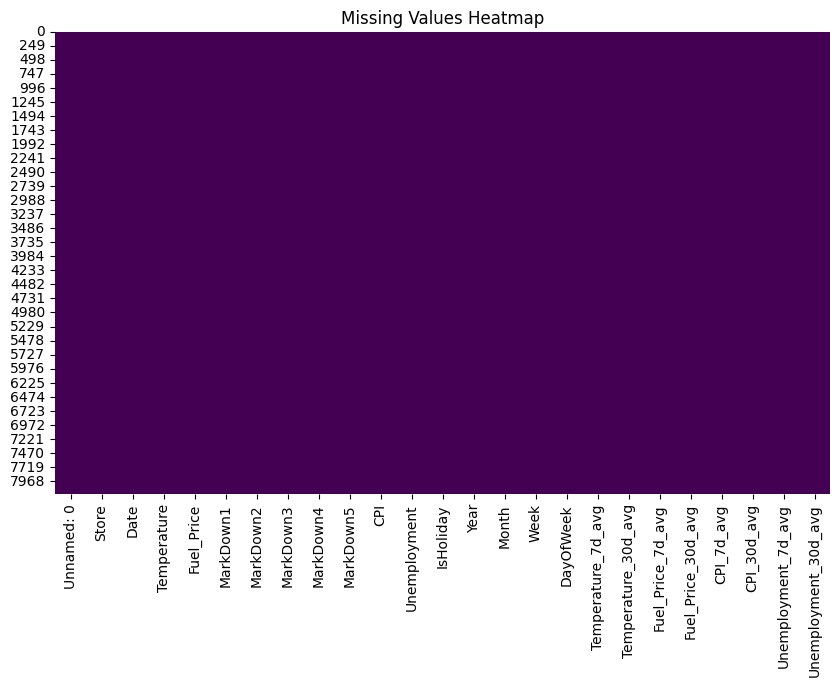

In [10]:
plt.figure(figsize = (10, 6))
sns.heatmap(df.isnull(), cbar = False, cmap = 'viridis')
plt.title("Missing Values Heatmap")
plt.show()

## Univariate Analysis

In [19]:
numeric_cols = ["Temperature", "Fuel_Price", "CPI", "Unemployment"] + \
               ["MarkDown1", "MarkDown2", "MarkDown3", "MarkDown4", "MarkDown5"]

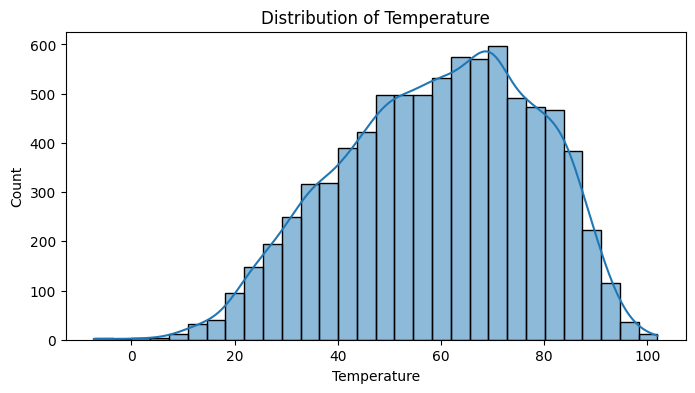

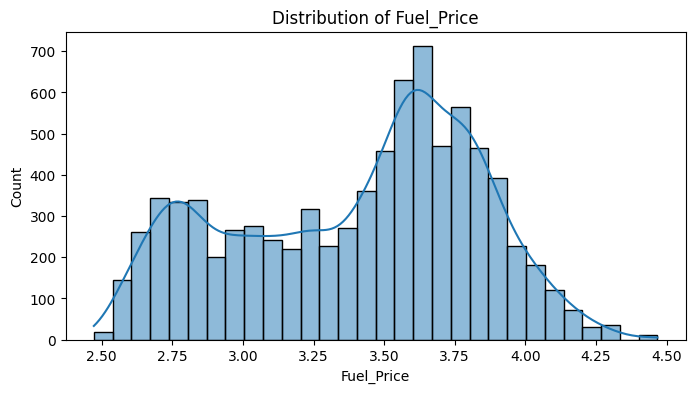

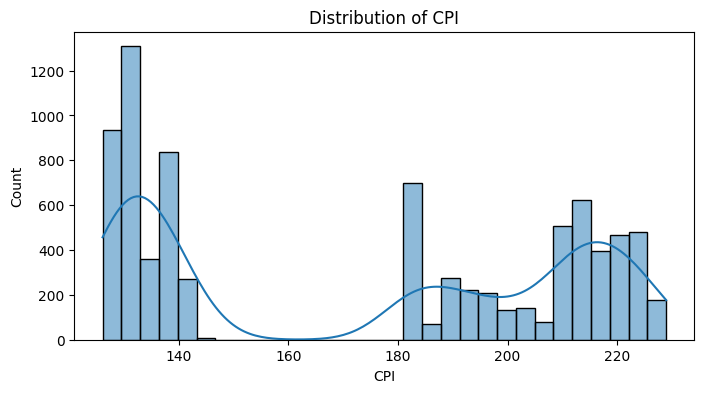

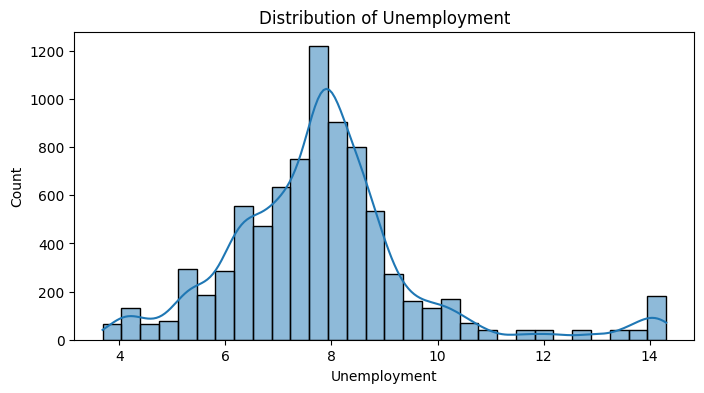

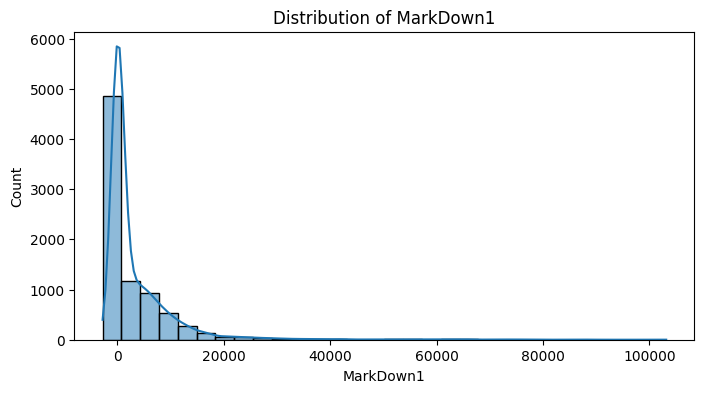

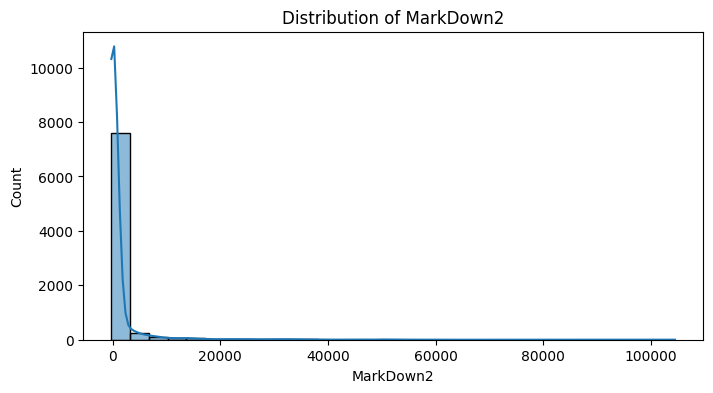

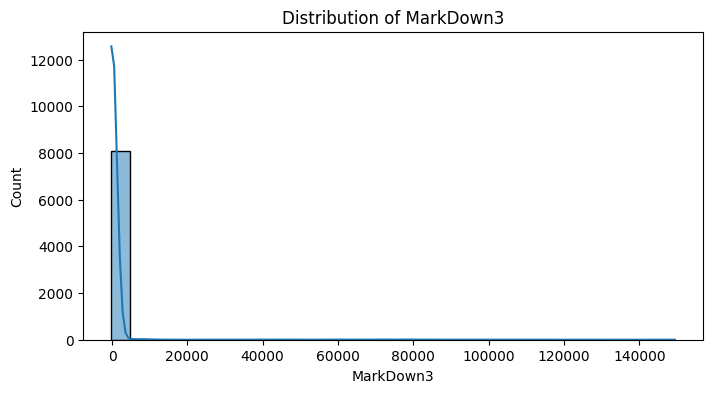

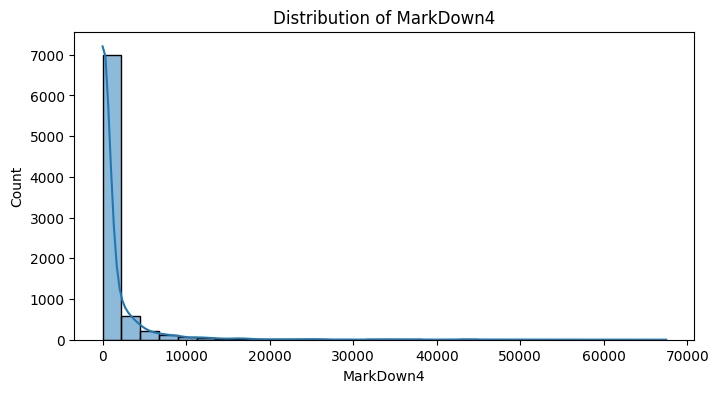

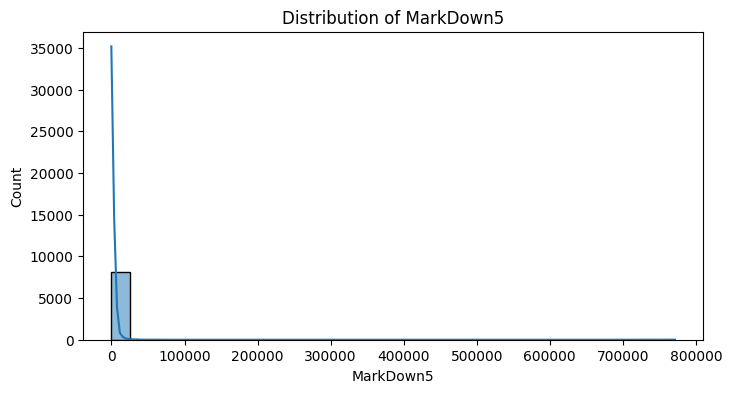

In [12]:
for col in numeric_cols:
    plt.figure(figsize=(8,4))
    sns.histplot(df[col], bins= 30, kde = True)
    plt.title(f"Distribution of {col}")
    plt.show()

## Correlation Heatmap

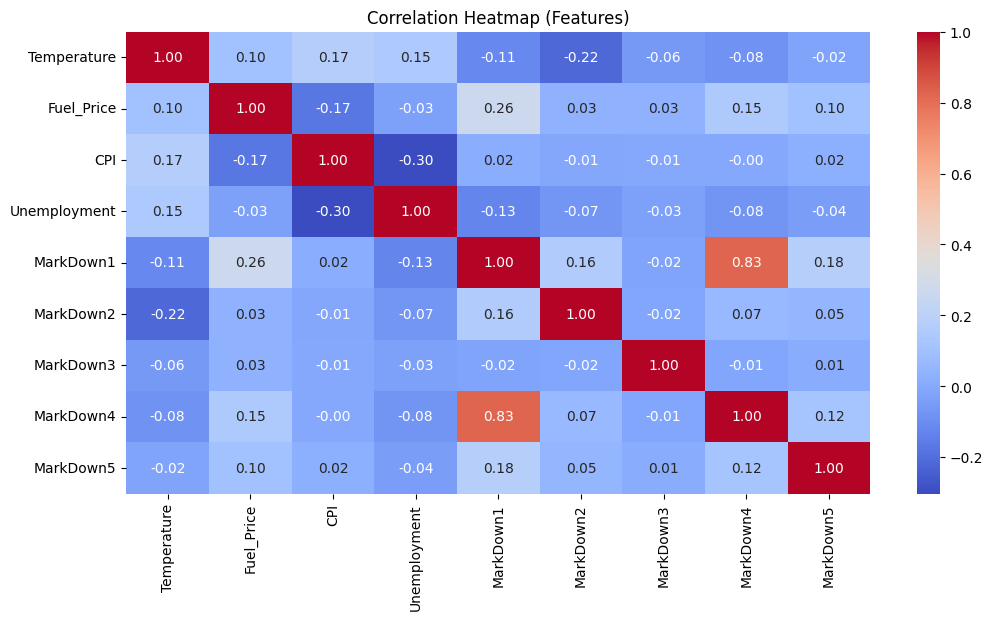

In [21]:
plt.figure(figsize=(12, 6))
corr = df[numeric_cols].corr()
sns.heatmap(corr, annot = True, cmap = 'coolwarm', fmt = '.2f')
plt.title("Correlation Heatmap (Features)")
plt.show()

## Time Series Trends

In [22]:
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values("Date")

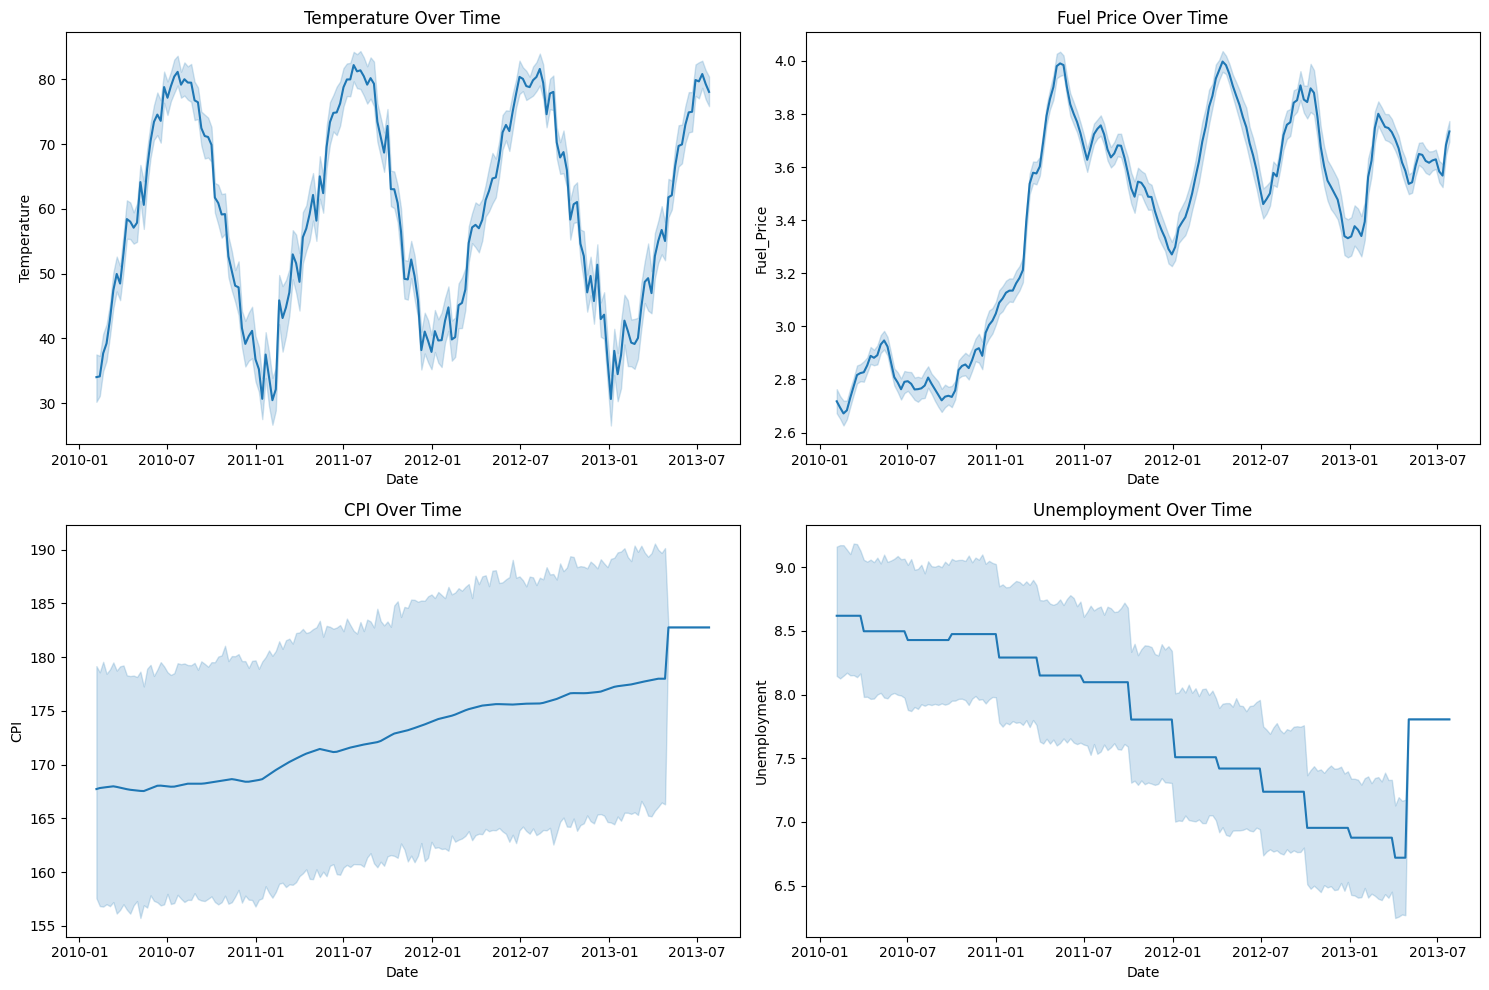

In [25]:
fig, axes = plt.subplots(2,2, figsize=(15,10))
sns.lineplot(data=df, x="Date", y="Temperature", ax=axes[0,0])
axes[0,0].set_title("Temperature Over Time")

sns.lineplot(data=df, x="Date", y="Fuel_Price", ax=axes[0,1])
axes[0,1].set_title("Fuel Price Over Time")

sns.lineplot(data=df, x="Date", y="CPI", ax=axes[1,0])
axes[1,0].set_title("CPI Over Time")

sns.lineplot(data=df, x="Date", y="Unemployment", ax=axes[1,1])
axes[1,1].set_title("Unemployment Over Time")

plt.tight_layout()
plt.show()

## Holiday vs Non-Holiday Comparison

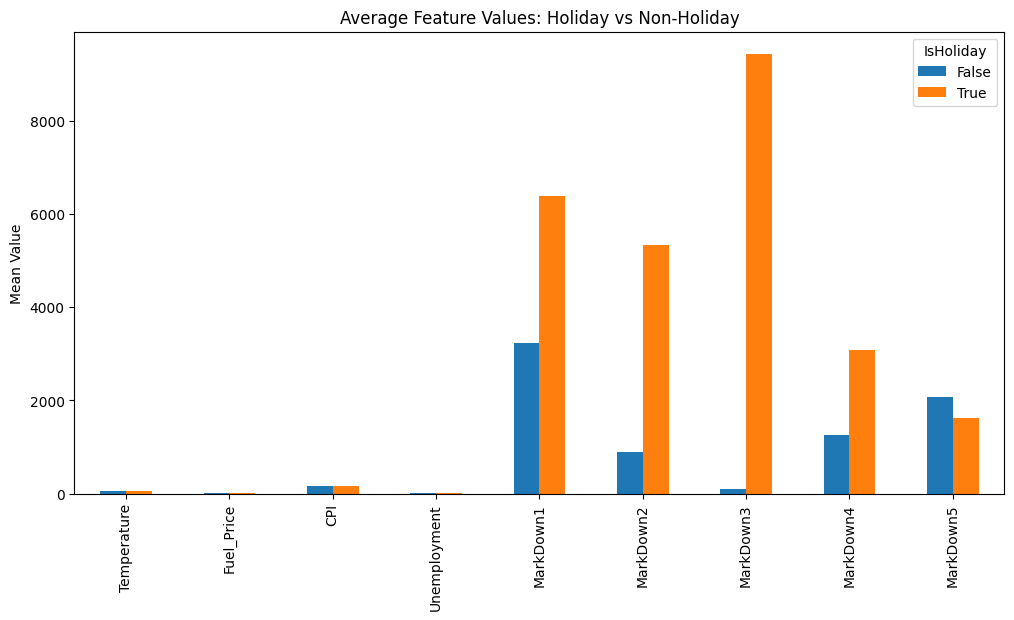

In [26]:
holiday_means = df.groupby("IsHoliday")[numeric_cols].mean().T
holiday_means.plot(kind="bar", figsize=(12,6))
plt.title("Average Feature Values: Holiday vs Non-Holiday")
plt.ylabel("Mean Value")
plt.show()

## Store-Level Analysis

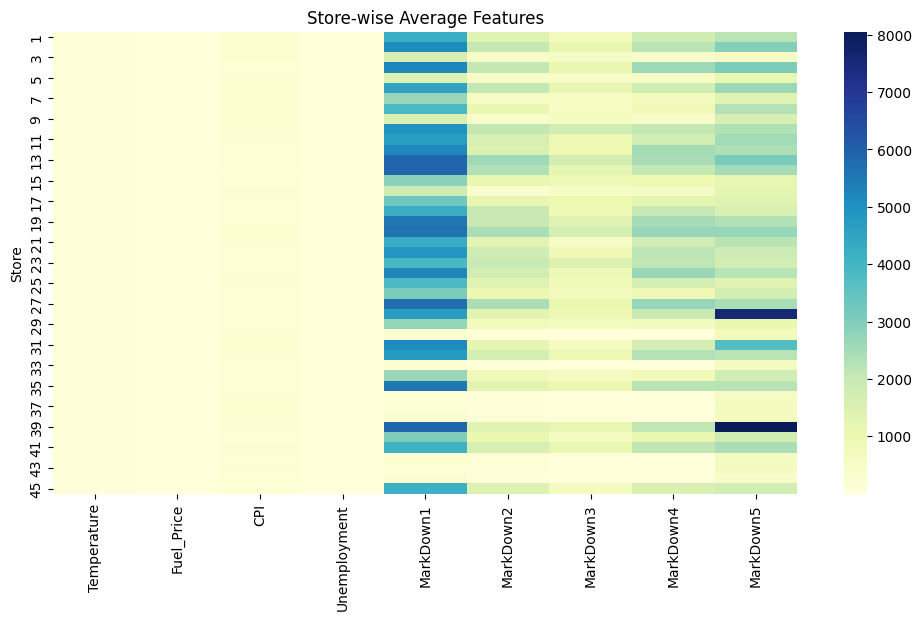

In [27]:
store_summary = df.groupby("Store")[numeric_cols].mean()
plt.figure(figsize=(12,6))
sns.heatmap(store_summary, cmap="YlGnBu")
plt.title("Store-wise Average Features")
plt.show()

## EDA Steps

- Overview → dataset shape, data types, missing values, summary stats.

- Missing Values → heatmap to check gaps.

- Univariate Analysis → histograms/KDE for Temperature, Fuel_Price, CPI, Unemployment, MarkDowns.

- Correlation → heatmap for numeric features.

- Time Trends → line plots (Temperature, CPI, Fuel_Price, Unemployment over time).

- Holiday Effect → compare average values on holidays vs non-holidays.

- Store-Level Analysis → heatmap of feature averages by store.